## NLP Joke Model for generating jokes from single word prompts, trained on short jokes from reddit.com/Jokes

<center><img src = 'karen.jpg'><\center>

### Going to focus on short length jokes within our data to train nlp model

In [1]:
import boto3
import pandas as pd

In [2]:
# Set up data requests for AWS DynamoDB
# Set AWS resource type to dynamo
dynamodb = boto3.resource('dynamodb')

# Set AWS dynamo table by setting name of table in dynamo dash
table = dynamodb.Table('jokes_table')

# Scan entire jokes table and pull in items to dataframe

response = (table.scan()
            .get('Items', [])
)

In [3]:
# json to dataframe
jokes = pd.json_normalize(response)

In [4]:
jokes.head()

,score,date,id,title,body
0,54892,2016-10-02,55gonm,My favorite joke: Everyone Knows Dave,"Dave was bragging to his boss one day, ""You kn..."
1,58036,2019-02-24,atziea,R Kelly is really changing the rap game,\n\n\n\nHe takes the art out of rap artist
2,67925,2020-10-07,j6q49y,What is the most expensive video-streaming ser...,College
3,14193,2020-11-14,jtobw6,3 nuns die and go to Heaven,"At the Pearly Gates, St. Peter tells them that..."
4,58793,2017-06-29,6k64b6,What is Gordon Ramsay's favorite subreddit?,It's fucking r/aww\n\n\nedit: Fucking hell thi...


In [5]:
# Find the length of the joke body and title combination
jokes['joke_length'] = jokes.title.str.len() + jokes.body.str.len()

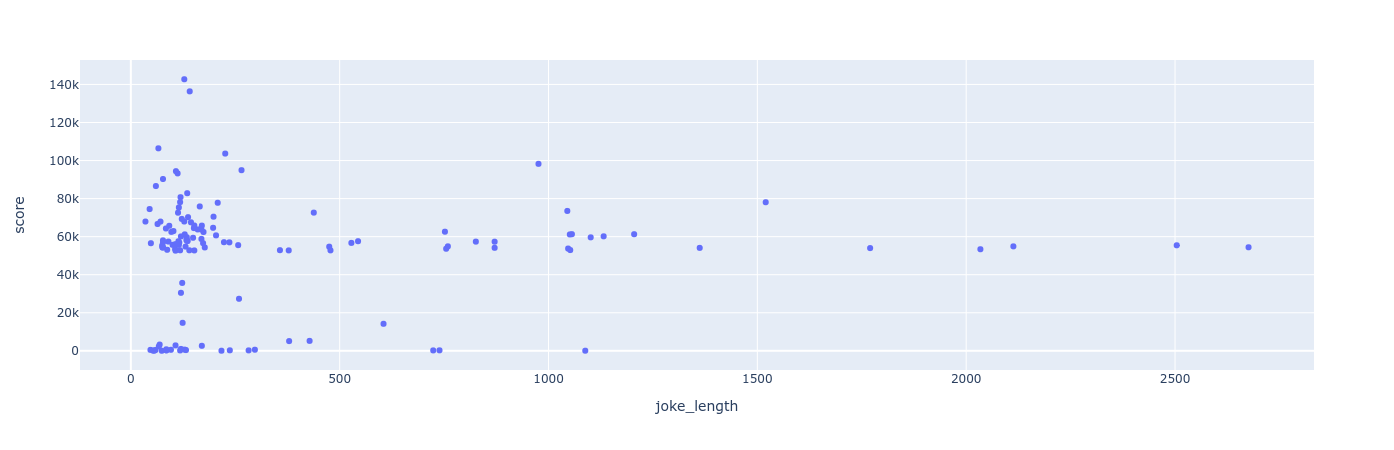

In [12]:
# Graph histogram of joke lengths
import plotly.express as px

fig = px.scatter(jokes, x = 'joke_length', y = 'score')
fig.show()

#### From the scater plot of joke score versus lenght, some clear clustering occurs around the jokes lengths in the 0-250 range, and joke scores in the 45K-93K range. As more data is brought in, we will see if this clustering continues.

In [16]:
# Setting some random conditions to check the jokes that appear clustered above
jokes_best = jokes[(jokes['score'] > 40_000) & (jokes['joke_length'] <= 250)]
jokes_best

,score,date,id,title,body,joke_length
1,58036,2019-02-24,atziea,R Kelly is really changing the rap game,\n\n\n\nHe takes the art out of rap artist,77
2,67925,2020-10-07,j6q49y,What is the most expensive video-streaming ser...,College,71
4,58793,2017-06-29,6k64b6,What is Gordon Ramsay's favorite subreddit?,It's fucking r/aww\n\n\nedit: Fucking hell thi...,169
6,52644,2017-02-13,5tn84z,Breaking News: Bill Gates has agreed to pay fo...,On the condition he gets to install windows.\n...,107
7,75344,2019-07-19,cf6h70,If America is storming Area 51 then the Europe...,"We’ll take the aliens, you get the predators",115
...,...,...,...,...,...,...
115,58190,2018-07-19,8zwqq6,My girlfriend borrowed $100 from me. After 3ye...,I lost Interest in that relationship.,133
116,94414,2017-12-15,7jtg65,Ajit Pai.,That's it. That's the whole fucking joke.\n\nE...,108
121,59681,2017-05-24,6d2lom,If I had a dollar for every time someone over ...,Then I could afford a house in the economy the...,134
122,65798,2017-04-11,64oinr,The front page is filled with memes in referen...,... United.,170
